# Exploratory Data Analysis for Crypto Data Set
## For publication on Github
###This notebook performs an exploratory data analysis (EDA) on a cleaned dataset of cryptocurrency prices. The data includes daily historical prices for major cryptocurrencies.


In [ ]:
#Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

## 📂 Load Cleaned Data

📎 **Dataset Source:** [Top 50 Cryptocurrencies Dataset on Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory)

Please download the CSV, clean it according to your needs, and place the cleaned version in your working directory.

In [ ]:
# Load cleaned data (must be in the same directory or provide the full path)
df_filtered = pd.read_csv("cleaned_crypto_data.csv", index_col=["Crypto", "Date"], parse_dates=["Date"])

In [ ]:
df_filtered.head()

Price   Open   High    Low     Vol.  Change %
Crypto  Date                                                     
Bitcoin 2016-01-01  434.0  430.0  438.0  425.9  46970.0      0.94
        2016-01-02  433.7  434.0  437.4  430.7  33570.0     -0.06
        2016-01-03  430.7  433.7  434.1  423.1  54830.0     -0.70
        2016-01-04  433.3  430.7  435.3  428.6  53010.0      0.61
        2016-01-05  431.2  433.3  435.3  428.9  45030.0     -0.49

Now we are ready to explore the data - go to Chat for those exploratory steps.

# 1. Summary Statistics

In [ ]:
# Summary Statistics
print(df_filtered.describe())

              Price          Open          High           Low          Vol.  \
count   5601.000000   5601.000000   5601.000000   5601.000000  5.601000e+03   
mean    4030.721594   4021.347317   4145.820443   3883.885501  1.265190e+09   
std     9487.182961   9467.789270   9769.584540   9128.041777  5.533714e+09   
min        0.000774      0.000774      0.000793      0.000669  0.000000e+00   
25%        0.066249      0.064281      0.074843      0.060536  1.818100e+05   
50%      303.080000    303.060000    313.010000    290.550000  1.400000e+06   
75%     3821.900000   3816.700000   3907.400000   3689.000000  1.977000e+08   
max    63540.900000  63544.200000  64778.000000  62067.500000  1.468000e+11   

          Change %  
count  5601.000000  
mean      0.383824  
std       5.167605  
min     -14.030000  
25%      -1.930000  
50%       0.140000  
75%       2.330000  
max      19.330000  


In [ ]:
df_filtered.groupby("Crypto").describe()

Price                                                       \
           count          mean           std         min          25%   
Crypto                                                                  
Bitcoin   2063.0  10481.792971  13340.015364  368.000000  2258.750000   
Dogecoin  1544.0      0.031697      0.089853    0.000774     0.002333   
Ethereum  1994.0    477.474328    700.336013    6.700000   122.267500   

                                                    Open                ...  \
                  50%           75%          max   count          mean  ...   
Crypto                                                                  ...   
Bitcoin   6967.000000  10329.500000  63540.90000  2063.0  10457.931798  ...   
Dogecoin     0.002804      0.004648      0.68688  1544.0      0.031498  ...   
Ethereum   224.540000    455.335000   4167.78000  1994.0    475.829684  ...   

                  Vol.               Change %                             \
                   75%           max    count      mean       std    min   
Crypto                                                                     
Bitcoin   5.321300e+05  2.026000e+07   2063.0  0.324634  3.911462 -14.03   
Dogecoin  3.572500e+09  1.468000e+11   1544.0  0.329100  6.221588 -14.03   
Ethereum  8.617500e+06  7.747000e+07   1994.0  0.487437  5.405560 -14.03   

                                        
             25%    50%     75%    max  
Crypto                                  
Bitcoin  -1.2750  0.220  1.9100  19.33  
Dogecoin -2.6075 -0.085  2.1775  19.33  
Ethereum -2.2075  0.135  3.0475  19.33  

[3 rows x 48 columns]

# 2️⃣ Visualizing Price Trends

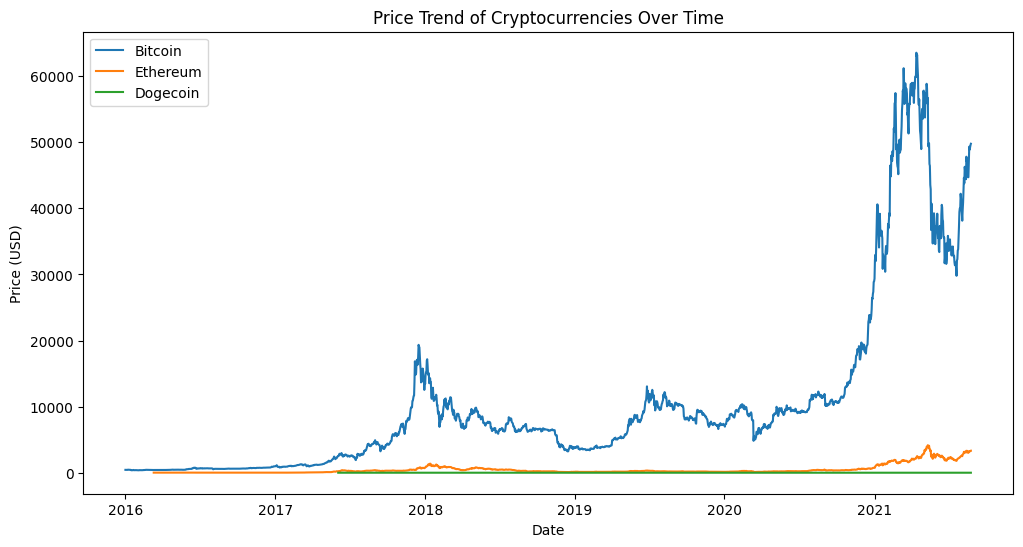

In [ ]:
plt.figure(figsize=(12,6))

for crypto in ["Bitcoin", "Ethereum", "Dogecoin"]:
    if crypto in df_filtered.index.get_level_values(0):  # Ensure crypto exists in the index
        subset = df_filtered.xs(crypto, level="Crypto")  # Get data for specific crypto
        plt.plot(subset.index, subset["Price"], label=crypto)
    else:
        print(f"{crypto} not found in dataset")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Price Trend of Cryptocurrencies Over Time")
plt.show()


##Normalize the Plot
If you want to take this further, you could:  

Normalize Prices: Scale all cryptos to a base value (e.g., 1) to compare relative growth.  
Log Scale: Use plt.yscale("log") if the price differences are too extreme.  
Moving Averages: Smooth out fluctuations using a rolling average (df_filtered["Price"].rolling(30).mean()).  

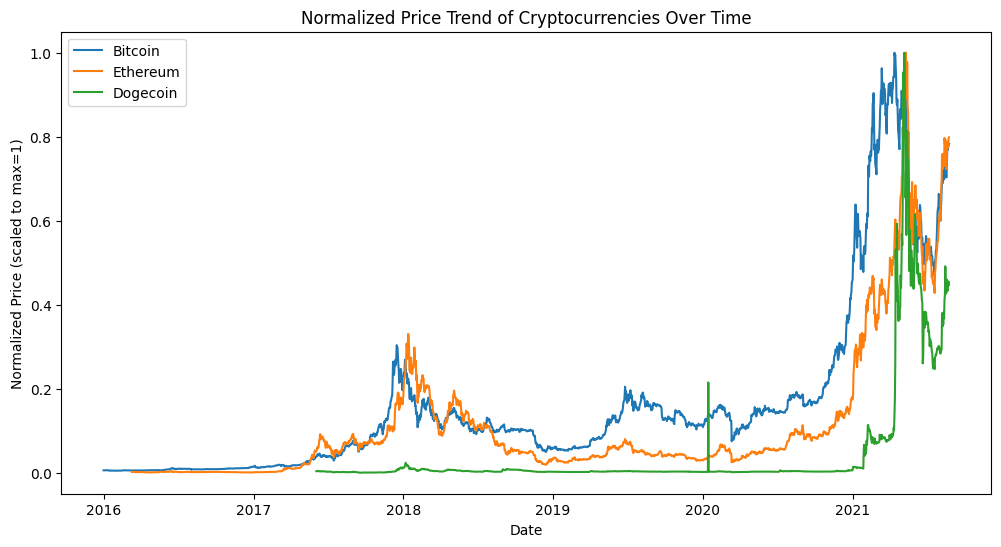

In [ ]:
##Normalizing the plot
plt.figure(figsize=(12,6))

for crypto in ["Bitcoin", "Ethereum", "Dogecoin"]:
    if crypto in df_filtered.index.get_level_values(0):  # Ensure crypto exists in the index
        subset = df_filtered.xs(crypto, level="Crypto")  # Get data for specific crypto

        # Normalize price by dividing by max price
        normalized_price = subset["Price"] / subset["Price"].max()

        plt.plot(subset.index, normalized_price, label=crypto)
    else:
        print(f"{crypto} not found in dataset")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Normalized Price (scaled to max=1)")
plt.title("Normalized Price Trend of Cryptocurrencies Over Time")
plt.show()


##Histogram of Volume

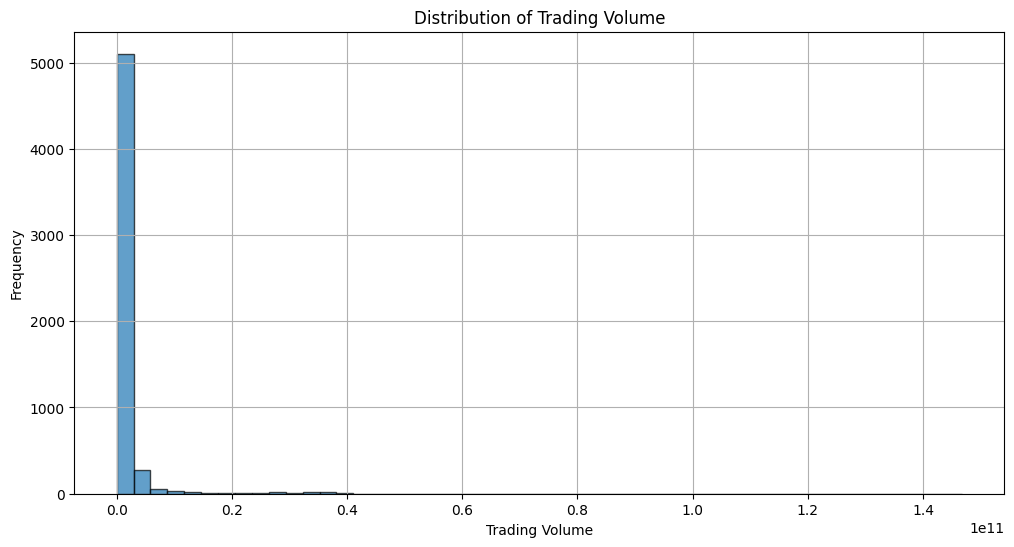

In [ ]:
plt.figure(figsize=(12,6))
df_filtered["Vol."].hist(bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.title("Distribution of Trading Volume")
plt.show()

In [ ]:
# We will have to clip the lower and upper outliers to get a better picture (like we did with the data wrangling notebook)
#Let's also clip the lower outlier
# Define the lower and upper thresholds at the 1st and 99th percentiles
# Define thresholds at the 1st and 99th percentiles
#Remove outliers instead of clipping them.
lower_threshold = df_filtered["Vol."].quantile(0.01)
upper_threshold = df_filtered["Vol."].quantile(0.99)

# Filter the data instead of clipping
df_filtered_volume = df_filtered[(df_filtered["Vol."] >= lower_threshold) &
                                 (df_filtered["Vol."] <= upper_threshold)]
df_filtered_volume.describe()

,Price,Open,High,Low,Vol.,Change %
count,5489.000000,5489.000000,5489.000000,5489.000000,5.489000e+03,5489.000000
mean,4071.865132,4061.662676,4187.851302,3922.693073,8.453594e+08,0.361410
std,9498.150626,9475.193870,9779.158023,9135.001897,2.903149e+09,5.133764
min,0.000774,0.000774,0.000793,0.000669,1.935000e+04,-14.030000
25%,0.195388,0.195401,0.204225,0.183208,1.919600e+05,-1.970000
50%,311.460000,311.120000,320.790000,297.010000,1.400000e+06,0.140000
75%,3908.000000,3905.690000,4005.700000,3809.300000,1.621300e+08,2.350000
max,63540.900000,63544.200000,64778.000000,62067.500000,3.193000e+10,19.330000


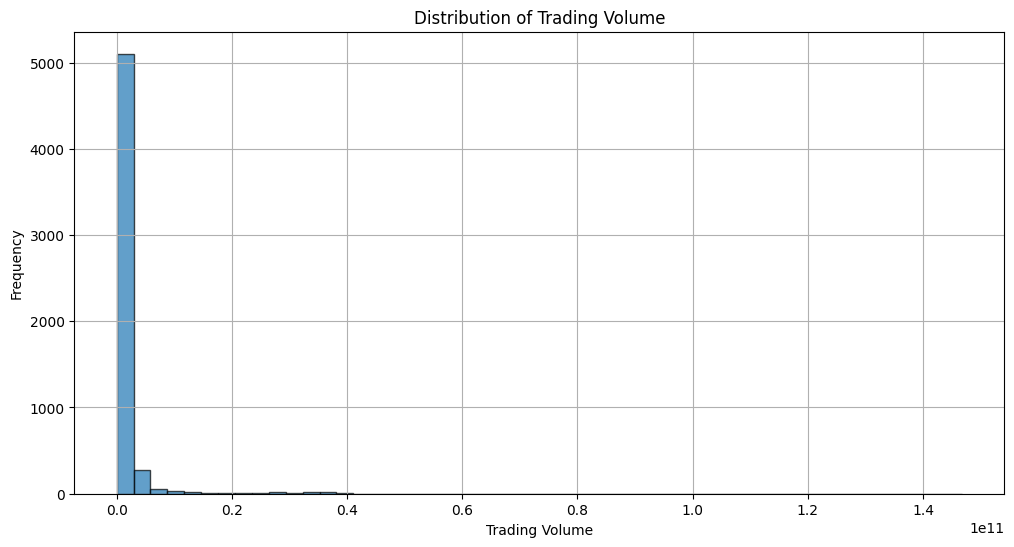

In [ ]:
#Now lets re-run the histogram
plt.figure(figsize=(12,6))
df_filtered["Vol."].hist(bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.title("Distribution of Trading Volume")
plt.show()

##Fix 2: Log Scale for Better Distribution
If the data is heavily right-skewed (which is common for trading volume), applying a log transformation can make the histogram more readable:

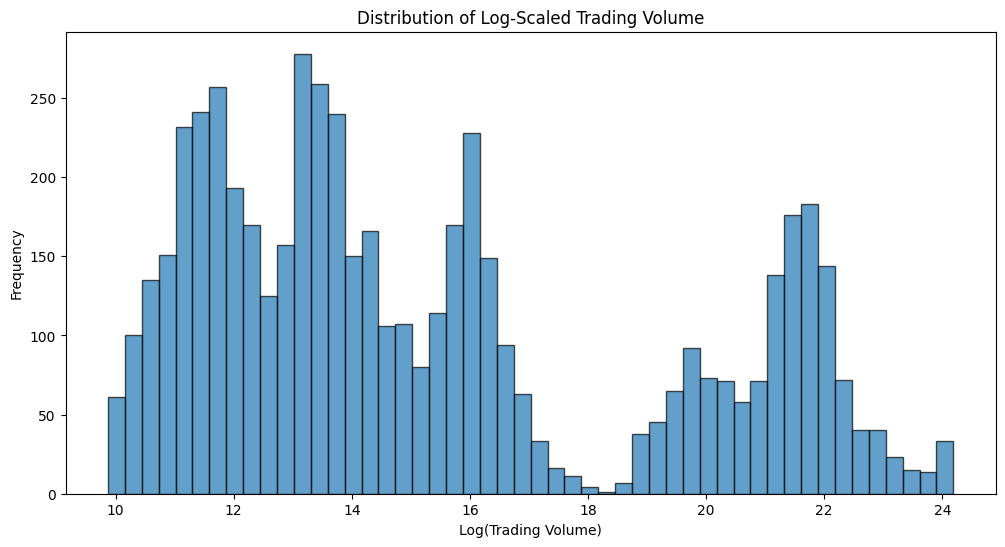

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(np.log1p(df_filtered_volume["Vol."]), bins=50, edgecolor="black", alpha=0.7)  # log1p avoids log(0) issue
plt.xlabel("Log(Trading Volume)")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Scaled Trading Volume")
plt.show()


##Price and Trading Volume

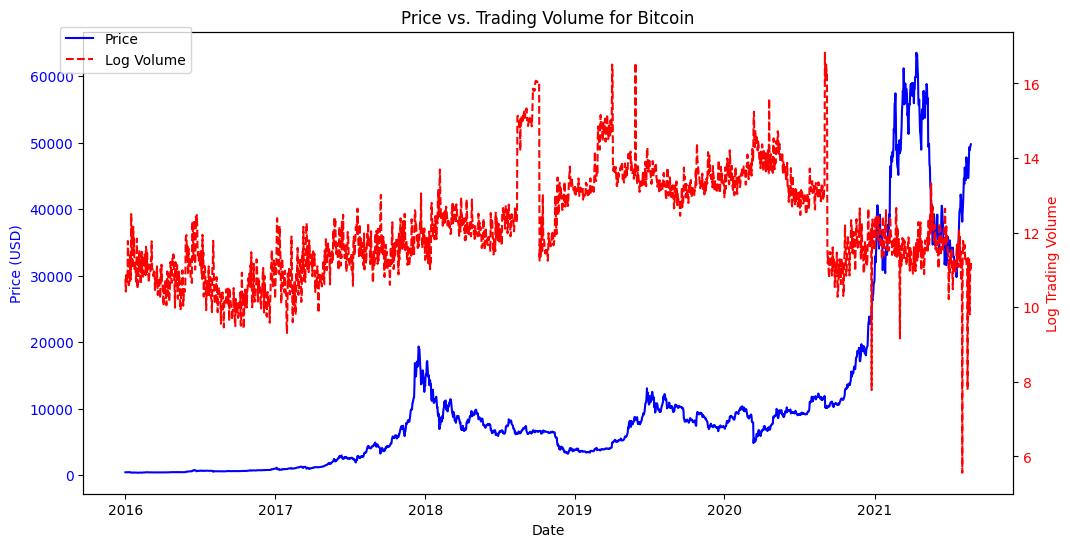

In [ ]:
# Select a specific cryptocurrency (change as needed)
crypto = "Bitcoin"

# Extract data for the selected crypto
subset = df_filtered.xs(crypto, level="Crypto")

# Set up the figure
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot price on the left y-axis
ax1.set_xlabel("Date")
ax1.set_ylabel("Price (USD)", color="blue")
ax1.plot(subset.index, subset["Price"], color="blue", label="Price")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a second y-axis for trading volume
ax2 = ax1.twinx()
ax2.set_ylabel("Log Trading Volume", color="red")
ax2.plot(subset.index, np.log1p(subset["Vol."]), color="red", linestyle="dashed", label="Log Volume")
ax2.tick_params(axis='y', labelcolor="red")

# Titles and legend
plt.title(f"Price vs. Trading Volume for {crypto}")
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()


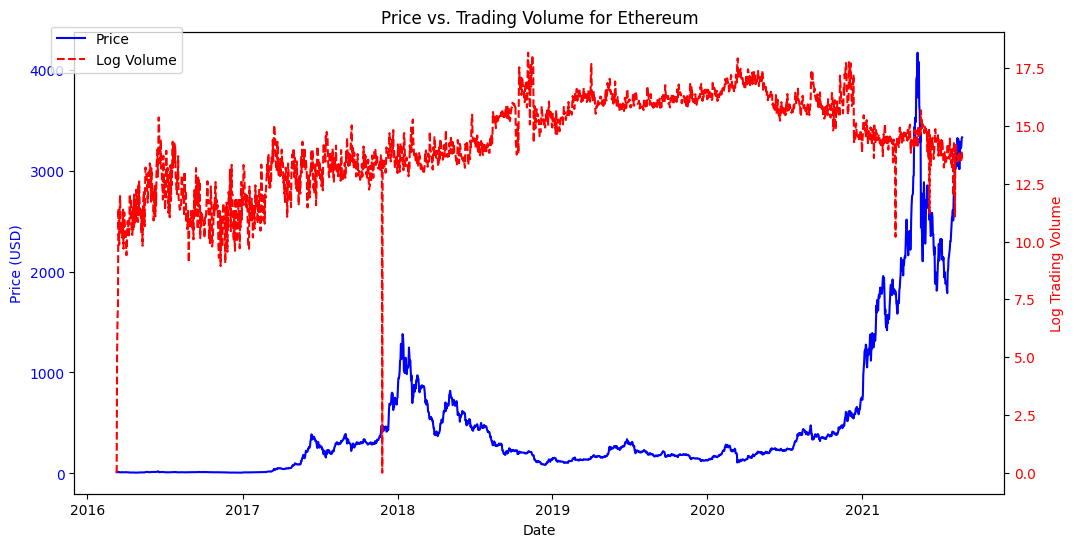

In [ ]:
# Let's plot Trading Volume Ethereum now
# Select a specific cryptocurrency (change as needed)
crypto = "Ethereum"

# Extract data for the selected crypto
subset = df_filtered.xs(crypto, level="Crypto")

# Set up the figure
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot price on the left y-axis
ax1.set_xlabel("Date")
ax1.set_ylabel("Price (USD)", color="blue")
ax1.plot(subset.index, subset["Price"], color="blue", label="Price")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a second y-axis for trading volume
ax2 = ax1.twinx()
ax2.set_ylabel("Log Trading Volume", color="red")
ax2.plot(subset.index, np.log1p(subset["Vol."]), color="red", linestyle="dashed", label="Log Volume")
ax2.tick_params(axis='y', labelcolor="red")

# Titles and legend
plt.title(f"Price vs. Trading Volume for {crypto}")
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()

###Investigation of the 3 vertical volume lines

In [ ]:
print(subset["Vol."].isna().sum())  # Count missing values

0


In [ ]:
print((subset["Vol."] == 0).sum())  # Count zero-volume days
print(subset[subset["Vol."] == 0])  # Show specific dates with zero volume

2
             Price   Open    High     Low  Vol.  Change %
Date                                                     
2016-03-10   11.75   11.2   11.85   11.07   0.0      4.91
2017-11-26  464.00  464.0  464.00  464.00   0.0      0.00


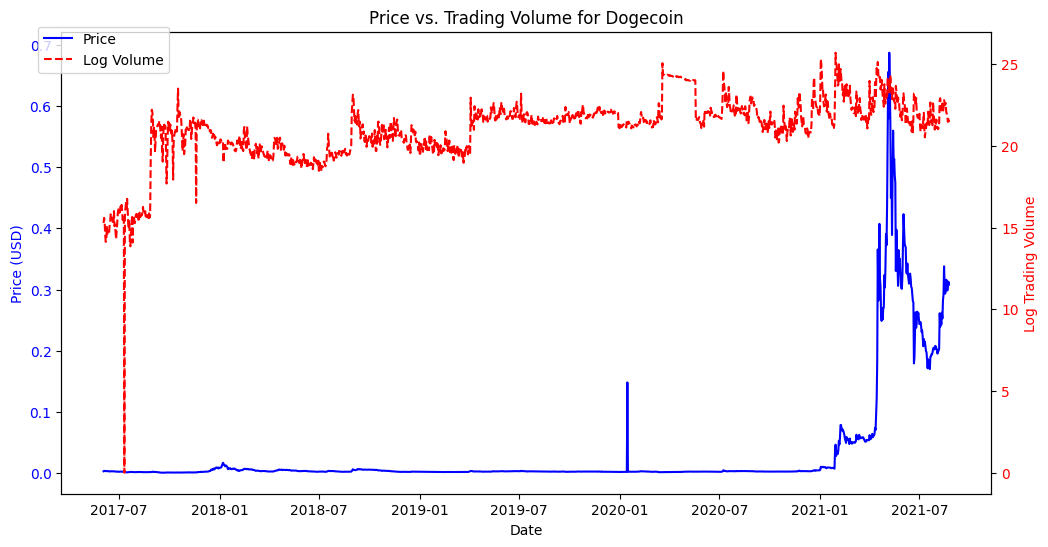

In [ ]:
# Let's plot Trading Volume Dogecoin now
# Select a specific cryptocurrency (change as needed)
crypto = "Dogecoin"

# Extract data for the selected crypto
subset = df_filtered.xs(crypto, level="Crypto")

# Set up the figure
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot price on the left y-axis
ax1.set_xlabel("Date")
ax1.set_ylabel("Price (USD)", color="blue")
ax1.plot(subset.index, subset["Price"], color="blue", label="Price")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a second y-axis for trading volume
ax2 = ax1.twinx()
ax2.set_ylabel("Log Trading Volume", color="red")
ax2.plot(subset.index, np.log1p(subset["Vol."]), color="red", linestyle="dashed", label="Log Volume")
ax2.tick_params(axis='y', labelcolor="red")

# Titles and legend
plt.title(f"Price vs. Trading Volume for {crypto}")
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()

##Box Plot of Volume

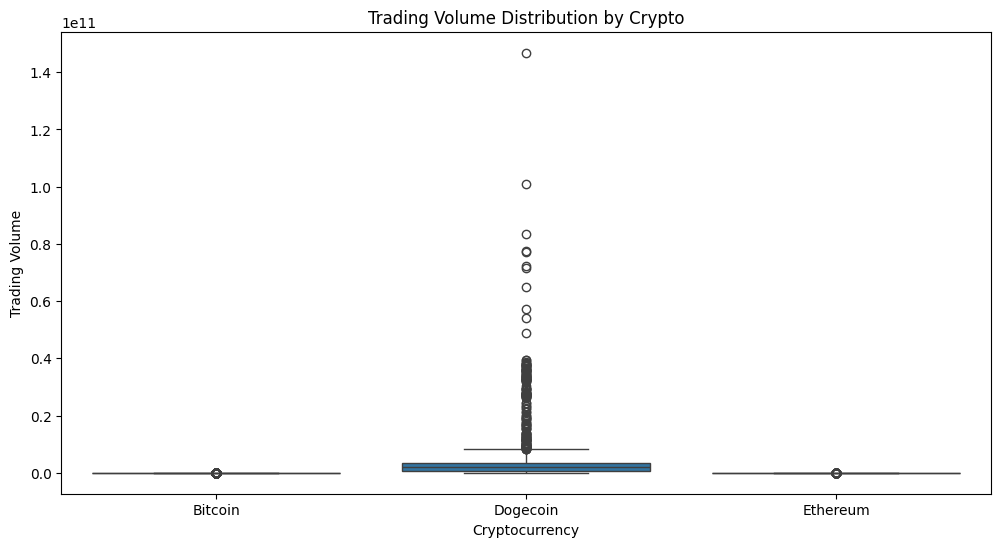

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_filtered.index.get_level_values("Crypto"), y=df_filtered["Vol."])
plt.xlabel("Cryptocurrency")
plt.ylabel("Trading Volume")
plt.title("Trading Volume Distribution by Crypto")
plt.show()

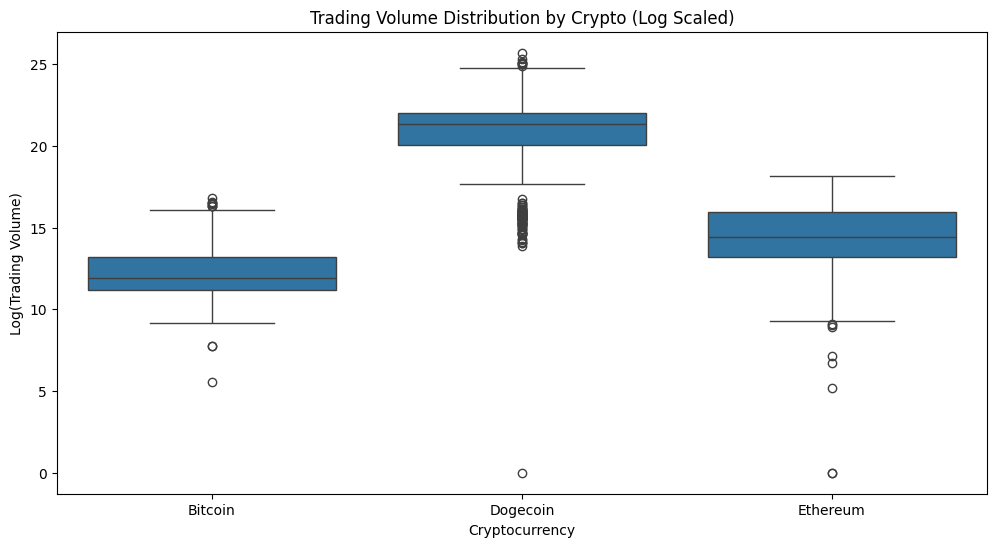

In [ ]:
#Apply a Log transformation and re-plot
plt.figure(figsize=(12,6))

# Apply log transformation to trading volume
df_filtered["Log_Vol"] = np.log1p(df_filtered["Vol."])  # log1p avoids log(0) issues

sns.boxplot(x=df_filtered.index.get_level_values("Crypto"), y=df_filtered["Log_Vol"])
plt.xlabel("Cryptocurrency")
plt.ylabel("Log(Trading Volume)")
plt.title("Trading Volume Distribution by Crypto (Log Scaled)")
plt.show()

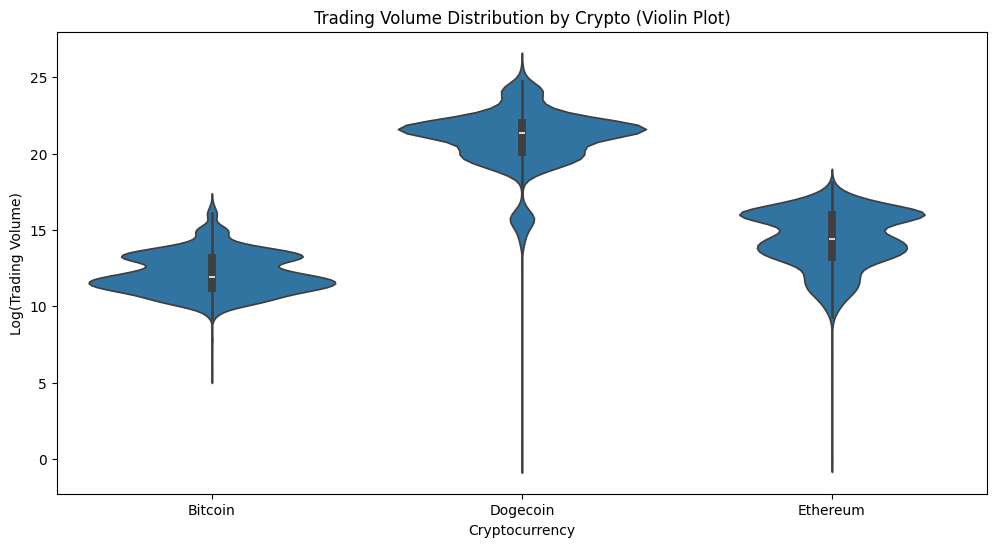

In [ ]:
#Violin plot
plt.figure(figsize=(12,6))
sns.violinplot(x=df_filtered.index.get_level_values("Crypto"), y=df_filtered["Log_Vol"])
plt.xlabel("Cryptocurrency")
plt.ylabel("Log(Trading Volume)")
plt.title("Trading Volume Distribution by Crypto (Violin Plot)")
plt.show()

In [ ]:
np.log1p(146_800_000_000)  # ≈ 25.1

np.float64(25.71233695313364)

In [ ]:
#Let's do a cross check of the actual max volume of dogecoin to see if that looks okay on our plot.
# Extract Dogecoin's data
bitcoin_data = df_filtered.xs("Bitcoin", level="Crypto")  # Select only bitcoin

# Find the maximum trading volume
max_bit_volume = bitcoin_data["Vol."].max()

# Print the result
print(f"Maximum Bitcoin Trading Volume: {max_bit_volume:,.0f}")

Maximum Bitcoin Trading Volume: 20,260,000


In [ ]:
np.log1p(20_260_000)

np.float64(16.824159106143153)

In [ ]:
min_bit_volume = bitcoin_data["Vol."].min()
print(f"Minimum Bitcoin Trading Volume: {min_bit_volume:,.0f}")

Minimum Bitcoin Trading Volume: 260


In [ ]:
np.log1p(260)

np.float64(5.564520407322694)

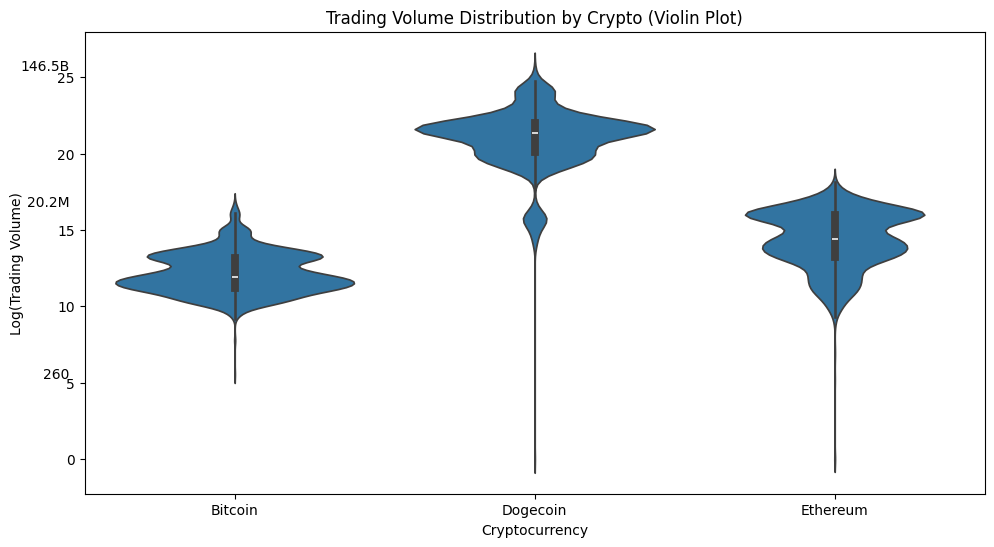

In [ ]:
#Let's increase label padding to make the graph more readable.
def format_large_number(num):
    """Convert large numbers into readable format (K, M, B, T)"""
    if num >= 1_000_000_000_000:
        return f"{num / 1_000_000_000_000:.1f}T"  # Trillions
    elif num >= 1_000_000_000:
        return f"{num / 1_000_000_000:.1f}B"  # Billions
    elif num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"  # Millions
    elif num >= 1_000:
        return f"{num / 1_000:.1f}K"  # Thousands
    return f"{num:.0f}"  # Less than 1K, keep original

plt.figure(figsize=(12,6))

# Apply log transformation
df_filtered["Log_Vol"] = np.log1p(df_filtered["Vol."])

# Create the violin plot
sns.violinplot(x=df_filtered.index.get_level_values("Crypto"), y=df_filtered["Log_Vol"])

plt.xlabel("Cryptocurrency")
plt.ylabel("Log(Trading Volume)", labelpad=24)  # Increase padding for y-axis label
plt.title("Trading Volume Distribution by Crypto (Violin Plot)")

# Define slightly lower log-scale reference points for better positioning
log_reference_points = [5.564, 16.82, 25.71]  # Adjusted for readability
volume_labels = [np.expm1(x) for x in log_reference_points]  # Convert back to actual volume

# Overlay formatted volume labels on the y-axis
for log_val, actual_vol in zip(log_reference_points, volume_labels):
    plt.text(-0.55, log_val, format_large_number(actual_vol), ha='right', va='center', fontsize=10, color="black")

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.15)  # Adds more space to the left

plt.show()

#Volatility Analysis  
##Rolling Volatility (30-day moving average)

In [ ]:
# Calculate rolling standard deviation as a measure of volatility
rolling_volatility = df_filtered.groupby("Crypto")["Change %"].rolling(window=30).std().droplevel(0)

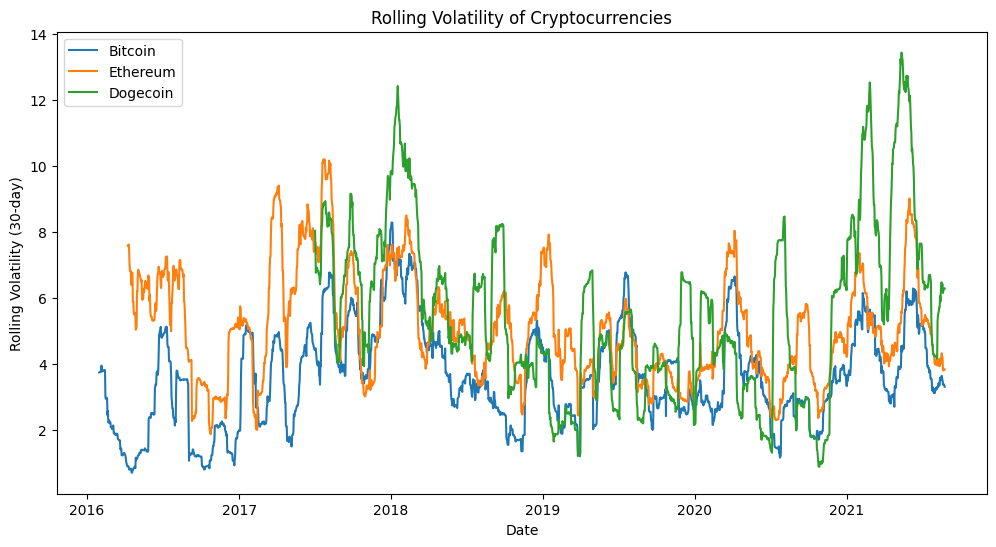

In [ ]:
#Plot rolling volatility
plt.figure(figsize=(12,6))
for crypto in ["Bitcoin", "Ethereum", "Dogecoin"]:
  plt.plot(rolling_volatility.loc[crypto], label=crypto)

plt.legend()
plt.xlabel("Date")
plt.ylabel("Rolling Volatility (30-day)")
plt.title("Rolling Volatility of Cryptocurrencies")
plt.show()

#Correlation Analysis
Heatmap of Price & Volume


In [ ]:
#Pivot table to align cryptos by columns
df_pivot = df_filtered.pivot_table(index="Date", columns="Crypto", values=["Price", "Vol."])

In [ ]:
#Compute correlation matrix
corr_matrix = df_pivot.corr()

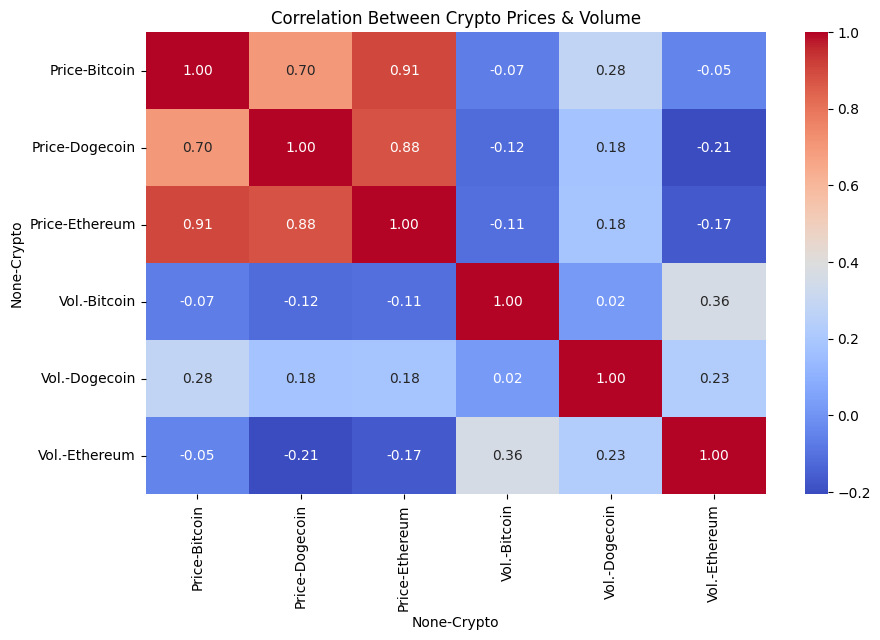

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Crypto Prices & Volume")
plt.show()

#Detrending
"To explore deeper interactions beyond price trends, I applied detrending before calculating correlations—similar to what researchers do when studying systemic risk or interdependencies."

Most crypto prices have long-term trends—like the Bitcoin bull run in 2021. But sometimes we're more interested in short-term co-movement between assets than overall growth.

Detrending helps us uncover relationships that aren't just driven by shared upward (or downward) trends.

In [ ]:
#Let's subtract the 30-day rolling average from each price to remove trends:
# Apply detrending using a rolling 30-day mean
detrended_prices = df_filtered[["Price"]].copy()
detrended_prices["Detrended"] = detrended_prices["Price"] - detrended_prices["Price"].rolling(window=30).mean()

# Drop NaNs created by rolling window
detrended_prices = detrended_prices.dropna()


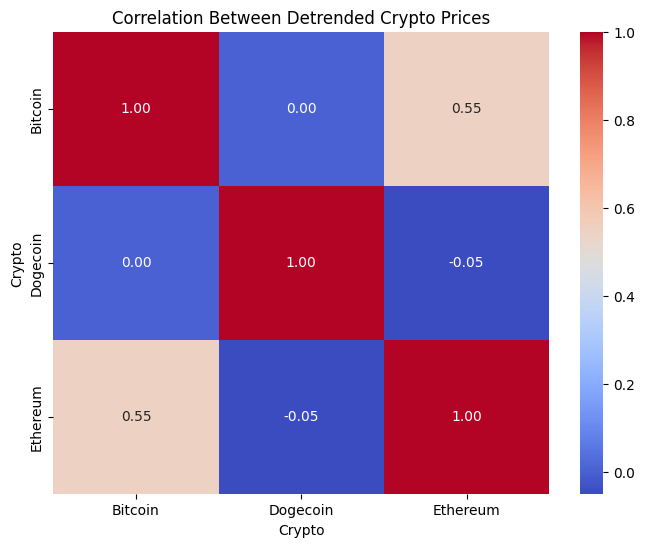

In [ ]:
#Now let's recalculate the correlation matrix based on detrended prices:
# Reconstruct multi-indexed DataFrame of detrended prices
detrended_df = detrended_prices.reset_index().pivot(index="Date", columns="Crypto", values="Detrended")

# Calculate correlation matrix of detrended price series
detrended_corr = detrended_df.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(detrended_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Detrended Crypto Prices")
plt.show()


## 🧹 Final Notes
- This notebook avoids Google Drive and Colab dependencies.
- Ensure `cleaned_crypto_data.csv` is available in your working directory.
- Consider including a separate notebook for cleaning the original Kaggle dataset if you're publishing.

🚀 Happy Analyzing!